### House Price Regression Project- Priyanka Pandit

In [94]:
from warnings import filterwarnings
filterwarnings('ignore')

### 
1. Read the dataset
2. Feature Selection
3. Final Pipeline
4. Model Building
5. Model Evaluation
6. Out of Sample prediction

### Step 1: Read the Train Dataset

In [95]:
import pandas as pd
df=pd.read_csv('training_set.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step 2: Perform basic data quality checks

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [97]:
m= df.isna().sum()
m[m>0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [98]:
df.duplicated().sum()

0

### Step 3: Seperate X & Y (SalePrice)

In [99]:
X = df.drop(columns=['Id','SalePrice'])
Y = df[['SalePrice']]

In [100]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [101]:
Y.head()

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000


### Step 4: Perform Feature Selection

In [102]:
# Seperate cat & con features for X
cat= list(X.columns[X.dtypes=='object'])
con= list(X.columns[X.dtypes!='object'])

In [103]:
cat

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [104]:
con

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [106]:
num_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

In [107]:
cat_pipe1 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant')),('ordinal',OrdinalEncoder())])

In [108]:
pre1 = ColumnTransformer([('num',num_pipe1,con),('cat',cat_pipe1,cat)]).set_output(transform='pandas')

In [109]:
X_pre = pre1.fit_transform(X)
X_pre.head()

,num__MSSubClass,num__LotFrontage,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__YearRemodAdd,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,...,cat__GarageType,cat__GarageFinish,cat__GarageQual,cat__GarageCond,cat__PavedDrive,cat__PoolQC,cat__Fence,cat__MiscFeature,cat__SaleType,cat__SaleCondition
0,0.073375,-0.220875,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.514104,0.575425,-0.288653,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
1,-0.872563,0.460320,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.570750,1.171992,-0.288653,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
2,0.073375,-0.084636,0.073480,0.651479,-0.517200,0.984752,0.830215,0.325915,0.092907,-0.288653,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0
3,0.309859,-0.447940,-0.096897,0.651479,-0.517200,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,...,5.0,2.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,0.0
4,0.073375,0.641972,0.375148,1.374795,-0.517200,0.951632,0.733308,1.366489,0.463568,-0.288653,...,1.0,1.0,4.0,4.0,2.0,3.0,4.0,4.0,8.0,4.0


In [110]:
# Feature Selection
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
lr= LinearRegression()
sel = SequentialFeatureSelector(lr,n_features_to_select='auto',direction='backward')
sel.fit_transform(X_pre,Y)
sel_cols = sel.get_feature_names_out()
sel_cols

array(['num__MSSubClass', 'num__LotArea', 'num__OverallQual',
       'num__OverallCond', 'num__YearBuilt', 'num__MasVnrArea',
       'num__BsmtFinSF1', 'num__BsmtFinSF2', 'num__BsmtUnfSF',
       'num__TotalBsmtSF', 'num__1stFlrSF', 'num__GrLivArea',
       'num__BsmtFullBath', 'num__KitchenAbvGr', 'num__TotRmsAbvGrd',
       'num__Fireplaces', 'num__GarageCars', 'num__WoodDeckSF',
       'num__ScreenPorch', 'num__PoolArea', 'num__YrSold', 'cat__Alley',
       'cat__LandContour', 'cat__Neighborhood', 'cat__HouseStyle',
       'cat__RoofMatl', 'cat__Exterior1st', 'cat__MasVnrType',
       'cat__ExterQual', 'cat__ExterCond', 'cat__BsmtQual',
       'cat__BsmtCond', 'cat__BsmtExposure', 'cat__BsmtFinType2',
       'cat__HeatingQC', 'cat__KitchenQual', 'cat__Functional',
       'cat__FireplaceQu', 'cat__GarageCond', 'cat__MiscFeature'],
      dtype=object)

In [111]:
len(sel_cols)


40

In [112]:
sel_cols[0]

'num__MSSubClass'

In [113]:
sel_cols[0].split('__')

['num', 'MSSubClass']

In [114]:
sel_cols[0].split('__')[1]

'MSSubClass'

In [115]:
imp_cols = []
for i in sel_cols:
    s= i.split('__')[1]
    imp_cols.append(s)

In [116]:
imp_cols

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold',
 'Alley',
 'LandContour',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCond',
 'MiscFeature']

In [117]:
X_sel = X[imp_cols]
X_sel

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType2,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageCond,MiscFeature
0,60,8450,7,5,2003,196.0,706,0,150,856,...,Gd,TA,No,Unf,Ex,Gd,Typ,NaN,TA,NaN
1,20,9600,6,8,1976,0.0,978,0,284,1262,...,Gd,TA,Gd,Unf,Ex,TA,Typ,TA,TA,NaN
2,60,11250,7,5,2001,162.0,486,0,434,920,...,Gd,TA,Mn,Unf,Ex,Gd,Typ,TA,TA,NaN
3,70,9550,7,5,1915,0.0,216,0,540,756,...,TA,Gd,No,Unf,Gd,Gd,Typ,Gd,TA,NaN
4,60,14260,8,5,2000,350.0,655,0,490,1145,...,Gd,TA,Av,Unf,Ex,Gd,Typ,TA,TA,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,0.0,0,0,953,953,...,Gd,TA,No,Unf,Ex,TA,Typ,TA,TA,NaN
1456,20,13175,6,6,1978,119.0,790,163,589,1542,...,Gd,TA,No,Rec,TA,TA,Min1,TA,TA,NaN
1457,70,9042,7,9,1941,0.0,275,0,877,1152,...,TA,Gd,No,Unf,Ex,Gd,Typ,Gd,TA,Shed
1458,20,9717,5,6,1950,0.0,49,1029,0,1078,...,TA,TA,Mn,Rec,Gd,Gd,Typ,NaN,TA,NaN


### Step 5: Create a final Pipeline

In [118]:
cat_sel = list(X_sel.columns[X_sel.dtypes=='object'])
con_sel = list(X_sel.columns[X_sel.dtypes!='object'])

In [119]:
cat_sel

['Alley',
 'LandContour',
 'Neighborhood',
 'HouseStyle',
 'RoofMatl',
 'Exterior1st',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageCond',
 'MiscFeature']

In [120]:
con_sel

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'ScreenPorch',
 'PoolArea',
 'YrSold']

In [121]:
from sklearn.preprocessing import OneHotEncoder

In [122]:
num_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())])

In [123]:
cat_pipe2 = Pipeline(steps=[('impute',SimpleImputer(strategy='constant',fill_value='Not_Avail')),('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))])

In [124]:
pre2 = ColumnTransformer([('num',num_pipe2,con_sel),('cat',cat_pipe2,cat_sel)]).set_output(transform='pandas')

In [125]:
X_sel_pre = pre2.fit_transform(X_sel)
X_sel_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,0.073375,-0.207142,0.651479,-0.517200,1.050994,0.514104,0.575425,-0.288653,-0.944591,-0.459303,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,-0.091886,-0.071836,2.179628,0.156734,-0.570750,1.171992,-0.288653,-0.641228,0.466465,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.073375,0.073480,0.651479,-0.517200,0.984752,0.325915,0.092907,-0.288653,-0.301643,-0.313369,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.309859,-0.096897,0.651479,-0.517200,-1.863632,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.073375,0.375148,1.374795,-0.517200,0.951632,1.366489,0.463568,-0.288653,-0.174865,0.199680,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### Step 6: Apply Train Test Split

In [126]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_sel_pre,Y,test_size=0.2,random_state=22)

In [127]:
xtrain.shape

(1168, 152)

In [128]:
xtest.shape

(292, 152)

In [129]:
xtrain.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
1070,-0.872563,-0.036564,-0.795151,-0.5172,-0.505681,0.093446,0.312233,-0.288653,-0.238254,-0.021501,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1379,0.546344,-0.078356,-0.795151,-0.5172,1.150356,-0.570750,-0.973018,-0.288653,-0.414838,-1.535564,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
138,0.073375,-0.145405,1.374795,-0.5172,0.918511,1.200440,0.492081,-0.288653,-0.523505,-0.121831,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
667,-0.872563,-0.239714,-0.071836,-0.5172,0.752907,0.857272,1.522914,-0.288653,-0.672923,0.799376,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1215,-0.872563,-0.343043,-0.795151,-0.5172,-0.174474,-0.570750,-0.578231,2.030525,-0.514450,-0.372654,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [130]:
ytrain.head()

,SalePrice
1070,135000
1379,167500
138,230000
667,193500
1215,125000


In [131]:
xtest.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
1159,0.073375,-0.139993,-0.071836,0.381743,0.090492,0.923692,-0.003596,-0.288653,-0.245045,-0.356693,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
866,-0.872563,0.013948,1.374795,-0.517200,1.150356,0.945832,-0.973018,-0.288653,2.424093,1.323826,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
432,2.438219,-0.861592,-0.795151,-0.517200,-0.008870,1.510398,0.060008,-0.288653,-0.618589,-0.666802,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
798,0.073375,0.300784,2.098110,-0.517200,1.216598,4.189324,-0.973018,-0.288653,3.076096,1.980528,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1287,-0.872563,2.604086,-0.795151,-0.517200,-0.240715,2.866466,0.807911,-0.288653,0.554111,1.291903,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [132]:
ytest.head()

,SalePrice
1159,185000
866,248900
432,122500
798,485000
1287,190000


### Step 7: Model Building

In [133]:
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [134]:
# Check r2 score in train
model1.score(xtrain,ytrain)

0.9083241481945232

In [135]:
# Check r2 score in test
model1.score(xtest,ytest)


-3.0608960703636853e+19

### Create a Ridge model

In [136]:
import numpy as np
params = {'alpha':np.arange(1,1000,1)}
params

{'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176,

In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge 
rr = Ridge()
gscv_ridge = GridSearchCV(rr, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv_ridge.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
             scoring='neg_mean_squared_error')

In [138]:
gscv_ridge.best_params_

{'alpha': 3}

In [139]:
gscv_ridge.best_score_

-1173319941.9601715

In [140]:
best_ridge = gscv_ridge.best_estimator_
best_ridge

Ridge(alpha=3)

In [141]:
best_ridge.score(xtrain, ytrain)

0.8887626793689185

In [142]:
best_ridge.score(xtest, ytest)

0.8868818108781429

### Create a Lasso Model

In [143]:
from sklearn.linear_model import Lasso
ls = Lasso()
gscv_lasso = GridSearchCV(ls, param_grid=params, cv=5, scoring='neg_mean_squared_error')
gscv_lasso.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99...
       911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923,
       924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936,
       937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949,
       950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962,
       963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975,
       976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988,
       989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999])},
             scoring='neg_mean_squared_error')

In [144]:
gscv_lasso.best_params_

{'alpha': 99}

In [145]:
gscv_lasso.best_score_

-1103729113.4075894

In [146]:
best_lasso = gscv_lasso.best_estimator_
best_lasso

Lasso(alpha=99)

In [147]:
best_lasso.score(xtrain, ytrain)

0.8998159519448508

In [148]:
best_lasso.score(xtest, ytest)

0.9005005725732634

### Step 8: Model Evaluation

In [149]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [150]:
def evaluate_model(model, x, y):
    ypred = model.predict(x)
    mse = mean_squared_error(y, ypred)
    rmse = mse**(1/2)
    mae = mean_absolute_error(y, ypred)
    r2 = r2_score(y, ypred)
    print(f'Mean Squared Error : {mse:.2f}')
    print(f'Root Mean Squared Error : {rmse:.2f}')
    print(f'Mean Absolute Error : {mae:.2f}')
    print(f'R2 Score : {r2:.4f}')

In [151]:
# Evaluate for ridge
print('Ridge Model Results :\n')
print('Train Results')
evaluate_model(best_ridge, xtrain, ytrain)
print('\n=====================================================\n')
print('Test Results')
evaluate_model(best_ridge, xtest, ytest)

Ridge Model Results :

Train Results
Mean Squared Error : 706404893.78
Root Mean Squared Error : 26578.28
Mean Absolute Error : 16192.74
R2 Score : 0.8888


Test Results
Mean Squared Error : 693620525.76
Root Mean Squared Error : 26336.68
Mean Absolute Error : 17890.67
R2 Score : 0.8869


In [152]:
# Evaluate for Lasso
print('Lasso Model Results :\n')
print('Train Results')
evaluate_model(best_lasso, xtrain, ytrain)
print('\n=====================================================\n')
print('Test Results')
evaluate_model(best_lasso, xtest, ytest)

Lasso Model Results :

Train Results
Mean Squared Error : 636211852.49
Root Mean Squared Error : 25223.24
Mean Absolute Error : 15562.70
R2 Score : 0.8998


Test Results
Mean Squared Error : 610112712.20
Root Mean Squared Error : 24700.46
Mean Absolute Error : 16343.23
R2 Score : 0.9005


### Cross validate r2 for ridge and lasso

In [153]:
from sklearn.model_selection import cross_val_score
scores_ridge = cross_val_score(best_ridge, xtrain, ytrain, cv=5, scoring='r2')
scores_ridge

array([0.60797029, 0.88876442, 0.83840222, 0.8281592 , 0.88502988])

In [154]:
scores_ridge.mean()

0.809665201057254

In [155]:
scores_lasso = cross_val_score(best_lasso,xtrain, ytrain, cv=5, scoring='r2')
scores_lasso

array([0.63137685, 0.90281419, 0.86354923, 0.81025279, 0.89556915])

In [156]:
scores_lasso.mean()

0.8207124437983595

### Step 9: Out of sample prediction

In [157]:
xnew = pd.read_csv('sample_set.csv')
xnew.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [158]:
pre2

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['MSSubClass', 'LotArea', 'OverallQual',
                                  'OverallCond', 'YearBuilt', 'MasVnrArea',
                                  'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                  'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
                                  'BsmtFullBath', 'KitchenAbvGr',
                                  'TotRmsAbvGrd', 'Fireplaces', 'GarageCars...
                                                  SimpleImputer(fill_value='Not_Avail',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Alley', 'LandContour', 'Neighborhood',
                                  'HouseStyle', 'RoofMatl', 'Exterior1st',
                                  'MasVnrType', 'ExterQual', 'ExterCond',
                                  'BsmtQual', 'BsmtCond', 'BsmtExposure',
                                  'BsmtFinType2', 'HeatingQC', 'KitchenQual',
                                  'Functional', 'FireplaceQu', 'GarageCond',
                                  'MiscFeature'])])

### Apply pre2.transform

In [159]:
xnew_pre = pre2.transform(xnew)
xnew_pre.head()

,num__MSSubClass,num__LotArea,num__OverallQual,num__OverallCond,num__YearBuilt,num__MasVnrArea,num__BsmtFinSF1,num__BsmtFinSF2,num__BsmtUnfSF,num__TotalBsmtSF,...,cat__GarageCond_Fa,cat__GarageCond_Gd,cat__GarageCond_Not_Avail,cat__GarageCond_Po,cat__GarageCond_TA,cat__MiscFeature_Gar2,cat__MiscFeature_Not_Avail,cat__MiscFeature_Othr,cat__MiscFeature_Shed,cat__MiscFeature_TenC
0,-0.872563,0.110763,-0.795151,0.381743,-0.340077,-0.570750,0.053428,0.604293,-0.672923,-0.400017,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,-0.872563,0.375850,-0.071836,0.381743,-0.439440,0.027027,1.051363,-0.288653,-0.365032,0.619239,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.073375,0.332053,-0.795151,-0.517200,0.852269,-0.570750,0.761852,-0.288653,-0.974021,-0.295127,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,0.073375,-0.054002,-0.071836,0.381743,0.885390,-0.460051,0.347326,-0.288653,-0.550672,-0.299687,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.492282,-0.552407,1.374795,-0.517200,0.686666,-0.570750,-0.396190,-0.288653,1.018211,0.507509,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [160]:
preds = best_lasso.predict(xnew_pre)
preds

array([115298.01815407, 150978.09413469, 176886.26134181, ...,
       179595.28456246, 108150.79039048, 220688.37946596])

### save above into dataframe


In [161]:
df_results = xnew[['Id']]
df_results

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [162]:
df_results['SalePrice_pred'] = preds

In [163]:
df_results

,Id,SalePrice_pred
0,1461,115298.018154
1,1462,150978.094135
2,1463,176886.261342
3,1464,192999.428652
4,1465,209212.830402
...,...,...
1454,2915,87759.383871
1455,2916,81900.347380
1456,2917,179595.284562
1457,2918,108150.790390


<Axes: xlabel='SalePrice_pred', ylabel='Count'>

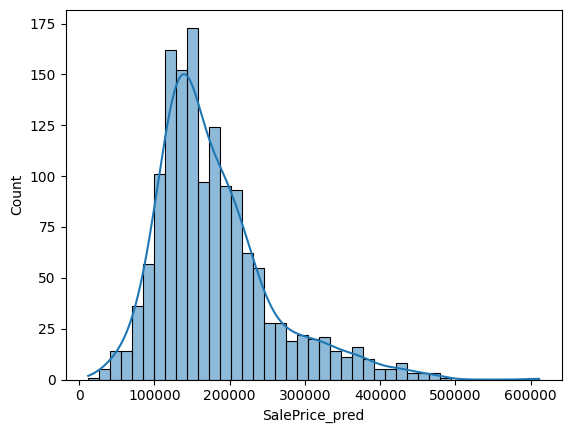

In [164]:
import seaborn as sns
sns.histplot(data=df_results, x='SalePrice_pred', kde=True)

In [165]:
df_results.to_csv('Results.csv', index=False)